# Exercise on neural networks (part 1)

In this exercise we will have a look at fully connected neural networks (FCNN) for a regression task and a classification task.

## What's an FCNN?
A fully-connected neural network is a type of artificial neural network where every neuron in one layer is connected to every neuron in the next layer. 

The basic structure of a fully-connected neural network is comprised of three types of layers: **input layer, hidden layer(s), and output layer**. The input layer takes in the input data, which could be anything from an image to a sound wave to a text document. The output layer produces the final output, which could be a classification label, a predicted value, or something else, depending on the problem being solved. The hidden layer(s) are layers between the input and output layers, where the actual computation happens. These layers consist of neurons that process the input data and pass it forward through the network.

Each neuron in a fully-connected neural network receives input from all the neurons in the previous layer, applies some kind of activation function to that input, and produces an output. The output of each neuron is then sent to every neuron in the next layer, and the process is repeated until the output layer is reached.

The number of neurons in the input layer is determined by the size of the input data, while the number of neurons in the output layer is determined by the desired output of the network. The number of neurons in the hidden layers is usually chosen based on experimentation and the complexity of the problem being solved.

<img src="https://drive.google.com/uc?id=1cdOhtdwmrBPdiv28GD41IJWjo8b6B7cx"  width="50%" height="35%">

## Software

We use TensorFlow to build the NNs in this exercise. TensorFlow is quite easy to use and it has support for GPU acceleration. Another popular library is PyTorch, which is a bit more complex but also more flexible.

## Resources

* A really good series of videos from [3Brown1Blue](https://www.youtube.com/watch?v=aircAruvnKk&list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi)
* TensorFlow [guide](https://www.tensorflow.org/guide)

## Datasets
* The first dataset is about the price of houses in [California](https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset). The goal is to predict the median house value for California districts given some features (median income in block group, median house age in block group, average number of rooms per household, etc.)

* The second dataset contains labeled [images](https://www.cs.toronto.edu/~kriz/cifar.html). The goal is to classify the images based on the label. 

In [1]:
# As usual, we import the modules
import tensorflow as tf
import numpy as np
import sklearn
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the Boston Housing dataset
dataset = fetch_california_housing()

X = dataset['data']
y = dataset['target']

feature_names = dataset['feature_names']
target_name = dataset['target_names']

# Check the features and the target
print(feature_names)
print(target_name)


['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
['MedHouseVal']


In [2]:
# Split the train and test parts
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the train and test parts
scaler = StandardScaler()
X0_train = scaler.fit_transform(X_train)
X0_test = scaler.transform(X_test)

## Comparison with least-squares regression

We know that a linear shallow neural network should behave as regular least-square, so we will test it.
First, we build a linear regression to predict the median house value for California districts.

In [5]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# First, we use good old linear regression
model_lr = LinearRegression()
model_lr.fit(X0_train, y_train)

y_pred_train = model_lr.predict(X0_train)
y_pred_test = model_lr.predict(X0_test)

# Evaluate the model on the testing data
score_train = r2_score(y_pred_train, y_train)
score_test = r2_score(y_pred_test, y_test)

print(f"R2 score on training data: {score_train:.2f}")
print(f"R2 score on testing data: {score_test:.2f}")

plt.scatter(y_test, y_pred_test)
plt.plot(y_test, y_test, c='r', lw=2)
plt.show()


NameError: name 'X0_train' is not defined

In [36]:
# Build a linear neural network

input_shape = (8,)
output_shape = 1

# Define the neural network architecture
model_nn = tf.keras.models.Sequential([
    tf.keras.layers.Dense(output_shape, input_shape=input_shape, activation='linear')
])

# Compile the model with an optimizer and loss function
model_nn.compile(optimizer='adam', loss='mse')

# Print the model summary
model_nn.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 1)                 9         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [37]:
# Train the model for 25 epochs
history = model_nn.fit(X0_train, y_train, epochs=25, 
                       validation_data=(X0_test, y_test))


Train on 16512 samples, validate on 4128 samples
Epoch 1/25
16512/16512 [==============================] - 1s 55us/sample - loss: 4.9156 - val_loss: 3.8235
Epoch 2/25
16512/16512 [==============================] - 1s 36us/sample - loss: 3.0141 - val_loss: 2.3168
Epoch 3/25
16512/16512 [==============================] - 1s 35us/sample - loss: 1.8401 - val_loss: 1.3995
Epoch 4/25
16512/16512 [==============================] - 1s 32us/sample - loss: 1.1556 - val_loss: 0.9012
Epoch 5/25
16512/16512 [==============================] - 1s 36us/sample - loss: 0.7969 - val_loss: 0.6619
Epoch 6/25
16512/16512 [==============================] - 0s 30us/sample - loss: 0.6334 - val_loss: 0.5696
Epoch 7/25
16512/16512 [==============================] - 1s 34us/sample - loss: 0.5711 - val_loss: 0.5452
Epoch 8/25
16512/16512 [==============================] - 0s 30us/sample - loss: 0.5486 - val_loss: 0.5419
Epoch 9/25
16512/16512 [==============================] - 1s 35us/sample - loss: 0.5392 - val_l

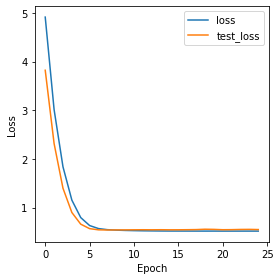

In [38]:
# We can check the training history

fig, ax = plt.subplots(figsize=(4, 4))
ax.plot(history.history['loss'], label='loss')
ax.plot(history.history['val_loss'], label = 'test_loss')
ax.set_ylabel('Loss')    

ax.set_xlabel('Epoch')
ax.legend()

fig.tight_layout()


R2 score on training data: 0.36
R2 score on testing data: 0.33


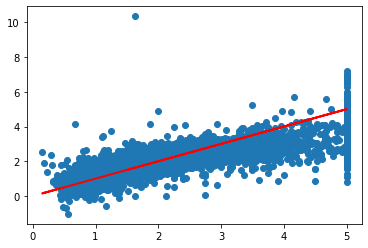

In [39]:
# Check the score
y_pred_train = model_nn.predict(X0_train)
y_pred_test = model_nn.predict(X0_test)

# Evaluate the model on the testing data
score_train = r2_score(y_pred_train, y_train)
score_test = r2_score(y_pred_test, y_test)

print(f"R2 score on training data: {score_train:.2f}")
print(f"R2 score on testing data: {score_test:.2f}")

plt.scatter(y_test, y_pred_test)
plt.plot(y_test, y_test, c='r', lw=2)
plt.show()


In [40]:
# Compare the weights of the linear regression with the neural network weights.

weights_lr = model_lr.coef_
weights_nn = model_nn.get_weights()[0].flatten()

print(weights_lr)
print(weights_nn)

[ 0.85438303  0.12254624 -0.29441013  0.33925949 -0.00230772 -0.0408291
 -0.89692888 -0.86984178]
[ 0.83729476  0.12334541 -0.268949    0.30673465  0.0056559  -0.04023855
 -0.90417737 -0.8854572 ]


In [41]:
# Modify the neural network to include an hidden layer and non-linear activation

# Define the neural network architecture
model_nn = tf.keras.models.Sequential([
    tf.keras.layers.Dense(4, input_shape=input_shape, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile the model with an optimizer and loss function
model_nn.compile(optimizer='adam', loss='mse')

# Print the model summary
model_nn.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 5         
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


In [44]:
# Train the model for 25 epochs
history = model_nn.fit(X0_train, y_train, epochs=50,
                       validation_data=(X0_test, y_test))

Train on 16512 samples, validate on 4128 samples
Epoch 1/50
16512/16512 [==============================] - 1s 43us/sample - loss: 0.3821 - val_loss: 0.3911
Epoch 2/50
16512/16512 [==============================] - 1s 40us/sample - loss: 0.3817 - val_loss: 0.3897
Epoch 3/50
16512/16512 [==============================] - 1s 37us/sample - loss: 0.3808 - val_loss: 0.3918
Epoch 4/50
16512/16512 [==============================] - 1s 37us/sample - loss: 0.3814 - val_loss: 0.3940
Epoch 5/50
16512/16512 [==============================] - 1s 40us/sample - loss: 0.3805 - val_loss: 0.3913
Epoch 6/50
16512/16512 [==============================] - 1s 37us/sample - loss: 0.3804 - val_loss: 0.3912
Epoch 7/50
16512/16512 [==============================] - 1s 34us/sample - loss: 0.3798 - val_loss: 0.3926
Epoch 8/50
16512/16512 [==============================] - 1s 36us/sample - loss: 0.3800 - val_loss: 0.3896
Epoch 9/50
16512/16512 [==============================] - 1s 37us/sample - loss: 0.3787 - val_l

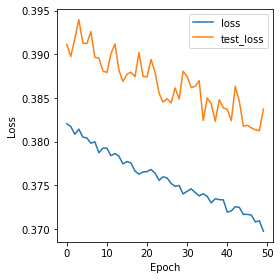

In [45]:
# We can check the training history

fig, ax = plt.subplots(figsize=(4, 4))
ax.plot(history.history['loss'], label='loss')
ax.plot(history.history['val_loss'], label = 'test_loss')
ax.set_ylabel('Loss')    

ax.set_xlabel('Epoch')
ax.legend()

fig.tight_layout()

R2 score on training data: 0.63
R2 score on testing data: 0.61


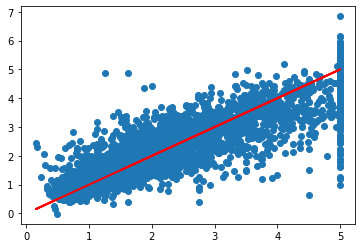

In [46]:
# Check the score
y_pred_train = model_nn.predict(X0_train)
y_pred_test = model_nn.predict(X0_test)

# Evaluate the model on the testing data
score_train = r2_score(y_pred_train, y_train)
score_test = r2_score(y_pred_test, y_test)

print(f"R2 score on training data: {score_train:.2f}")
print(f"R2 score on testing data: {score_test:.2f}")

plt.scatter(y_test, y_pred_test)
plt.plot(y_test, y_test, c='r', lw=2)
plt.show()

## FCNN for the classification of images of cats and dogs

Difference with the previous exercise: 
* the dataset contains 32 x 32 x 3 images (pixel x pixel x rgb), so we have to reshape each image into a vector.
* the task is classification, so the output should be either zero (cat) or one (dog).
* we have to use a different loss function: the categorical cross entropy loss.
* we want to transform the prediction into a probability: we introduce the softmax function.

### Categorial cross-entropy loss

It is the default loss function to use for multi-class classification problems where each class is assigned a unique integer value from 0 to (num_classes – 1). Computes the cross-entropy loss between true labels and predicted labels.

$\mathrm{Loss}=-\sum_{i=1}^{N} y_i \cdot \mathrm{log} \hat{y}_i$

### Softmax

Softmax is used to convert a vector of real-valued numbers into a probability distribution that sums to 1:
 
 $ \mathrm{softmax}(x_i) = \frac{e^{x_i}}{\sum_{j=1}^n e^{x_j}}$ 

where $x_i$ is the $i$th element of the input vector, and $n$ is the length of the vector.

In [2]:
import pandas as pd

# Import CIFAR10 dataset
# The CIFAR10 dataset contains 60,000 color images in 10 classes, with 6,000 images in each class. 
# The dataset is divided into 50,000 training images and 10,000 testing image

# The classes are:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# You can access the CIFAR10 directly from TensorFlow
cifar10 = tf.keras.datasets.cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [3]:
# The labels are an array of integers, ranging from 0 to 9.
df = pd.DataFrame(class_names,columns=['Class'])
print(df)

        Class
0    airplane
1  automobile
2        bird
3         cat
4        deer
5         dog
6        frog
7       horse
8        ship
9       truck


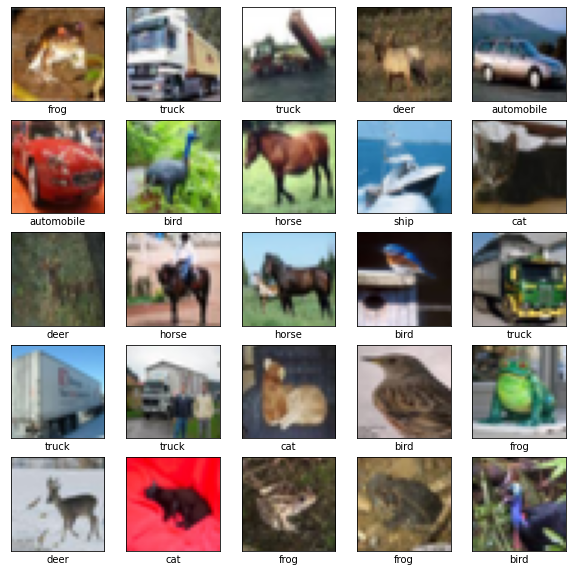

In [6]:
# First, we can visualize the CIFAR10 data
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()


In [7]:
# Now we create a cat_vs_dog dataset from Cifar10
class_names = ['cat', 'dog']

# Get from CIFAR10 the indexes for cats and dogs
idx_cats = np.argwhere(train_labels[:,0] == 3)
idx_dogs = np.argwhere(train_labels[:,0] == 5)

# Create the new dataset and change the labels: 1 for dogs and 0 for cats
# If you have kernel problems, reduce the training size
train_size = 5000

# create the matrices
train_images_cats_dogs = np.zeros((train_size,32,32,3), dtype='uint8')
train_labels_cats_dogs = np.zeros((train_size,1), dtype='int')

# fill the matrices of images
train_images_cats_dogs[:train_size//2] = train_images[idx_cats[:train_size//2,0]]
train_images_cats_dogs[train_size//2:train_size] = train_images[idx_dogs[:train_size//2,0]]

# fill the matrices of labels
train_labels_cats_dogs[:train_size//2] = tf.zeros_like(idx_cats[:train_size//2])
train_labels_cats_dogs[train_size//2:train_size] = tf.ones_like(idx_cats[:train_size//2])

# convert from numpy to tf tensor
train_images_cats_dogs = tf.convert_to_tensor(train_images_cats_dogs)

# Shuffle the train data before train
indices = tf.range(start=0, limit=tf.shape(train_images_cats_dogs)[0], dtype=tf.int32)
shuffled_indices = tf.random.shuffle(indices)

train_images_cats_dogs = tf.gather(train_images_cats_dogs, shuffled_indices)
train_labels_cats_dogs = tf.gather(train_labels_cats_dogs, shuffled_indices)

# We do the same for test dataset
idt_cats = np.argwhere(test_labels[:,0] == 3)
idt_dogs = np.argwhere(test_labels[:,0] == 5)

# If you have kernel problems, reduce the test size
test_size = 1000

test_images_cats_dogs = np.zeros((test_size,32,32,3), dtype='uint8')
test_labels_cats_dogs = np.zeros((test_size,1), dtype='int')

test_images_cats_dogs[:test_size//2] = test_images[idt_cats[:test_size//2,0]]
test_images_cats_dogs[test_size//2:test_size] = test_images[idt_dogs[:test_size//2,0]]

test_labels_cats_dogs[:test_size//2] = tf.zeros_like(idt_cats[:test_size//2])
test_labels_cats_dogs[test_size//2:test_size] = tf.ones_like(idt_cats[:test_size//2])

test_images_cats_dogs = tf.convert_to_tensor(test_images_cats_dogs)

# Shuffle the test data
indices = tf.range(start=0, limit=tf.shape(test_images_cats_dogs)[0], dtype=tf.int32)
shuffled_indices = tf.random.shuffle(indices)

test_images_cats_dogs = tf.gather(test_images_cats_dogs, shuffled_indices)
test_labels_cats_dogs = tf.gather(test_labels_cats_dogs, shuffled_indices)


2023-04-20 16:06:36.241634: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-20 16:06:36.242769: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 12. Tune using inter_op_parallelism_threads for best performance.


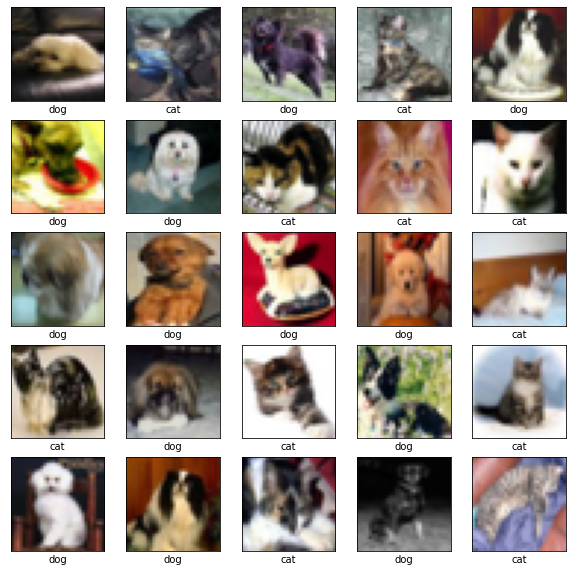

In [8]:
# In the end we end up with a training and test datasets that contains only dogs and cats

# Plot some pictures
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images_cats_dogs[i])
    plt.xlabel(class_names[train_labels_cats_dogs[i][0]])
plt.show()

In [9]:
# Preprocess the data: Normalize pixel values to be between 0 and 1
train_images_cats_dogs = train_images_cats_dogs / 255
test_images_cats_dogs = test_images_cats_dogs / 255

In [10]:
# Build the models using keras layers 
# (The basic building block of a neural network is the layer. 
# Layers extract representations from the data fed into them.)

# Fully-connected neural network
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(32, 32, 3)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(2)
])

# Documentation: https://www.tensorflow.org/guide/keras/sequential_model


In [11]:
# Overview of the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               393344    
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 258       
Total params: 393,602
Trainable params: 393,602
Non-trainable params: 0
_________________________________________________________________


In [12]:
# Documentation: https://www.tensorflow.org/guide/keras/train_and_evaluate/

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [13]:
history = model.fit(train_images_cats_dogs, train_labels_cats_dogs, 
                    epochs=20, 
                    validation_data=(test_images_cats_dogs, test_labels_cats_dogs))

Train on 5000 samples, validate on 1000 samples
Epoch 1/20
5000/5000 [==============================] - 2s 345us/sample - loss: 0.7760 - accuracy: 0.5420 - val_loss: 0.6800 - val_accuracy: 0.5610
Epoch 2/20
5000/5000 [==============================] - 1s 137us/sample - loss: 0.7027 - accuracy: 0.5642 - val_loss: 0.6872 - val_accuracy: 0.5610
Epoch 3/20
5000/5000 [==============================] - 1s 136us/sample - loss: 0.6746 - accuracy: 0.5840 - val_loss: 0.6732 - val_accuracy: 0.5860
Epoch 4/20
5000/5000 [==============================] - 1s 136us/sample - loss: 0.6670 - accuracy: 0.5900 - val_loss: 0.7094 - val_accuracy: 0.5430
Epoch 5/20
5000/5000 [==============================] - 1s 142us/sample - loss: 0.6648 - accuracy: 0.5928 - val_loss: 0.6697 - val_accuracy: 0.5910
Epoch 6/20
5000/5000 [==============================] - 1s 136us/sample - loss: 0.6593 - accuracy: 0.6012 - val_loss: 0.6801 - val_accuracy: 0.5730
Epoch 7/20
5000/5000 [==============================] - 1s 138us

[[ 1.0800407 -0.4429012]]
tf.Tensor([[1]], shape=(1, 1), dtype=int64)
1.720209
1000/1 - 0s - loss: 0.6203 - accuracy: 0.6080
test loss: 0.6704000768661499
test accuracy: 0.608


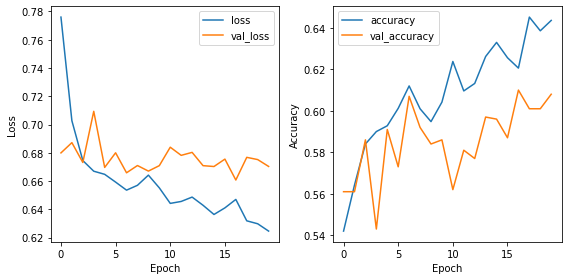

In [21]:
# Evaluate the model

pred = model.predict(test_images_cats_dogs[:1,:])
print(pred)
test = test_labels_cats_dogs[:1,:]
print(test)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
print(loss(test, pred).numpy())

test_loss, test_acc = model.evaluate(test_images_cats_dogs,  test_labels_cats_dogs, verbose=2)

print('test loss:', test_loss)
print('test accuracy:', test_acc)

fig, axs = plt.subplots(1, 2, figsize=(8, 4))
axs[0].plot(history.history['loss'], label='loss')
axs[0].plot(history.history['val_loss'], label = 'val_loss')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Loss')
axs[0].legend()

axs[1].plot(history.history['accuracy'], label='accuracy')
axs[1].plot(history.history['val_accuracy'], label = 'val_accuracy')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Accuracy')
axs[1].legend()

fig.tight_layout()
plt.show()


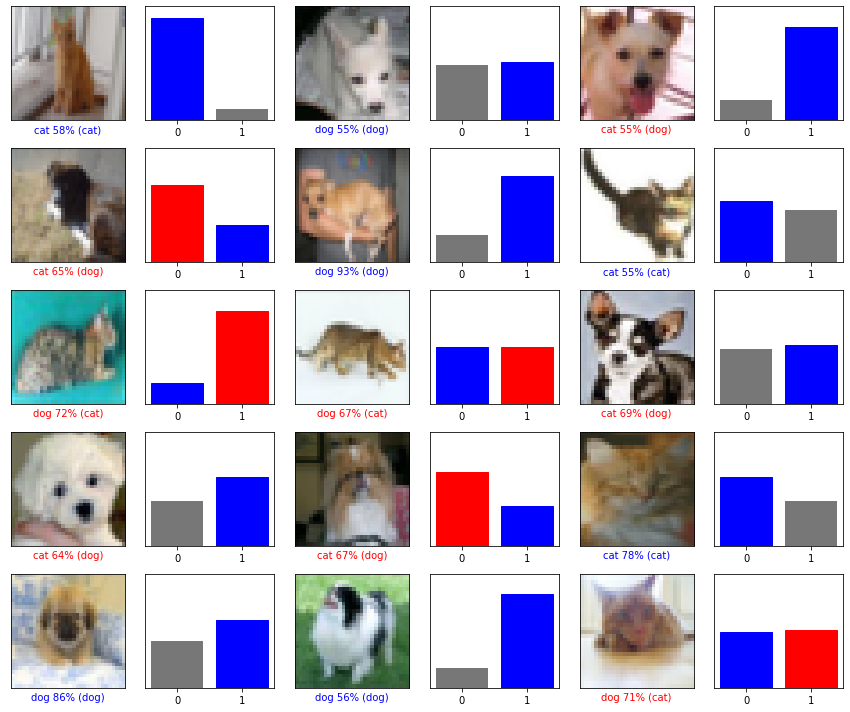

In [61]:
# Add the softmax layer
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images_cats_dogs)

def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i][0], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i][0]
  plt.grid(False)
  plt.xticks(range(len(class_names)))
  plt.yticks([])
  thisplot = plt.bar(range(len(class_names)), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels_cats_dogs, test_images_cats_dogs)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels_cats_dogs)
plt.tight_layout()
plt.show()



## To do:

* Try to classify a different dataset (trucks and cars for example).
* Try to change the parameters of the FCNN (number of layers, number of neurons, activation function, etc.) and see how the result is affected.

In [70]:
# We create a truck_vs_car dataset from Cifar10
class_names = ['truck', 'car']

idx_trucks = np.argwhere(train_labels[:,0] == 9)
idx_cars = np.argwhere(train_labels[:,0] == 1)

train_size = 5000

train_images_trucks_cars = np.zeros((train_size,32,32,3), dtype='uint8')
train_labels_trucks_cars = np.zeros((train_size,1), dtype='int')

train_images_trucks_cars[:train_size//2] = train_images[idx_trucks[:train_size//2,0]]
train_images_trucks_cars[train_size//2:train_size] = train_images[idx_cars[:train_size//2,0]]

train_labels_trucks_cars[:train_size//2] = tf.zeros_like(idx_trucks[:train_size//2])
train_labels_trucks_cars[train_size//2:train_size] = tf.ones_like(idx_cats[:train_size//2])

train_images_trucks_cars = tf.convert_to_tensor(train_images_trucks_cars)

indices = tf.range(start=0, limit=tf.shape(train_images_trucks_cars)[0], dtype=tf.int32)
shuffled_indices = tf.random.shuffle(indices)

train_images_trucks_cars = tf.gather(train_images_trucks_cars, shuffled_indices)
train_labels_trucks_cars = tf.gather(train_labels_trucks_cars, shuffled_indices)

idt_trucks = np.argwhere(test_labels[:,0] == 9)
idt_cars = np.argwhere(test_labels[:,0] == 1)

test_size = 1000

test_images_trucks_cars = np.zeros((test_size,32,32,3), dtype='uint8')
test_labels_trucks_cars = np.zeros((test_size,1), dtype='int')

test_images_trucks_cars[:test_size//2] = test_images[idt_trucks[:test_size//2,0]]
test_images_trucks_cars[test_size//2:test_size] = test_images[idt_cars[:test_size//2,0]]

test_labels_trucks_cars[:test_size//2] = tf.zeros_like(idt_trucks[:test_size//2])
test_labels_trucks_cars[test_size//2:test_size] = tf.ones_like(idt_cars[:test_size//2])

test_images_trucks_cars = tf.convert_to_tensor(test_images_trucks_cars)

indices = tf.range(start=0, limit=tf.shape(test_images_trucks_cars)[0], dtype=tf.int32)
shuffled_indices = tf.random.shuffle(indices)

test_images_trucks_cars = tf.gather(test_images_trucks_cars, shuffled_indices)
test_labels_trucks_cars = tf.gather(test_labels_trucks_cars, shuffled_indices)

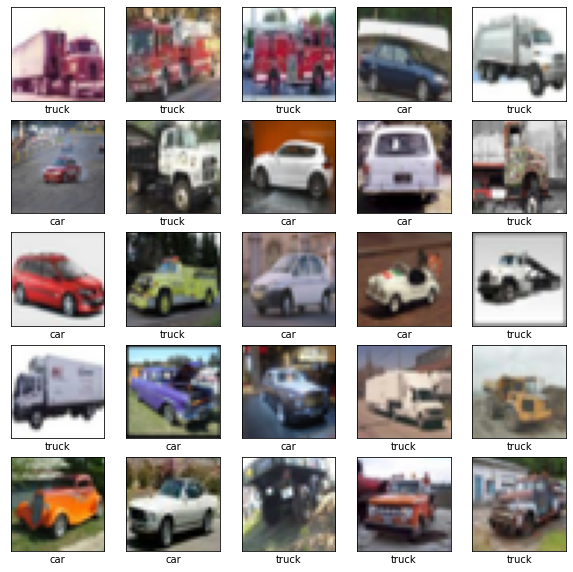

In [71]:
# Plot some pictures
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images_trucks_cars[i])
    plt.xlabel(class_names[train_labels_trucks_cars[i][0]])
plt.show()

In [72]:
# Preprocess the data: Normalize pixel values to be between 0 and 1
train_images_trucks_cars = train_images_trucks_cars / 255
test_images_trucks_cars = test_images_trucks_cars / 255

# Fully-connected neural network
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(32, 32, 3)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(2)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images_trucks_cars, train_labels_trucks_cars, 
                    epochs=40, 
                    validation_data=(test_images_trucks_cars, test_labels_trucks_cars))


Train on 5000 samples, validate on 1000 samples
Epoch 1/40
5000/5000 [==============================] - 2s 470us/sample - loss: 0.7103 - accuracy: 0.6214 - val_loss: 0.5797 - val_accuracy: 0.7030
Epoch 2/40
5000/5000 [==============================] - 1s 241us/sample - loss: 0.6340 - accuracy: 0.6452 - val_loss: 0.6245 - val_accuracy: 0.6670
Epoch 3/40
5000/5000 [==============================] - 1s 219us/sample - loss: 0.6052 - accuracy: 0.6746 - val_loss: 0.5889 - val_accuracy: 0.6780
Epoch 4/40
5000/5000 [==============================] - 1s 222us/sample - loss: 0.5870 - accuracy: 0.6856 - val_loss: 0.5798 - val_accuracy: 0.6990
Epoch 5/40
5000/5000 [==============================] - 1s 219us/sample - loss: 0.5685 - accuracy: 0.7018 - val_loss: 0.5905 - val_accuracy: 0.6740
Epoch 6/40
5000/5000 [==============================] - 1s 226us/sample - loss: 0.5676 - accuracy: 0.7038 - val_loss: 0.5698 - val_accuracy: 0.7180
Epoch 7/40
5000/5000 [==============================] - 1s 220us

1000/1 - 0s - loss: 253.0967 - accuracy: 0.4540
test loss: 232.17234301757813
test accuracy: 0.454


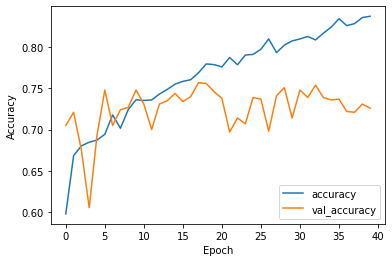

In [66]:
# Evaluate the model

plt.figure()
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images_cats_dogs,  test_labels_cats_dogs, verbose=2)

print('test loss:', test_loss)
print('test accuracy:', test_acc)

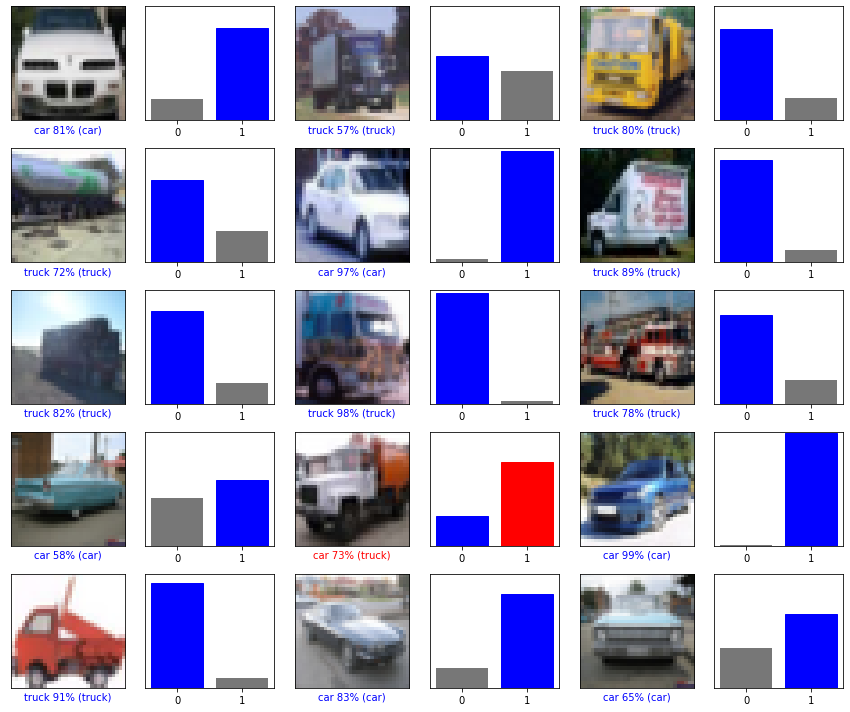

In [67]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images_trucks_cars)

num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels_trucks_cars, test_images_trucks_cars)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels_trucks_cars)
plt.tight_layout()
plt.show()